<a href="https://colab.research.google.com/github/Lloydster118/CW1-ML/blob/main/CW1%20RF%2C%20KNN%2C%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [2]:
# data = pd.read_csv('diabetes.csv')
data = load_breast_cancer()

# Convert the Bunch object to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Now you can use info() and describe()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

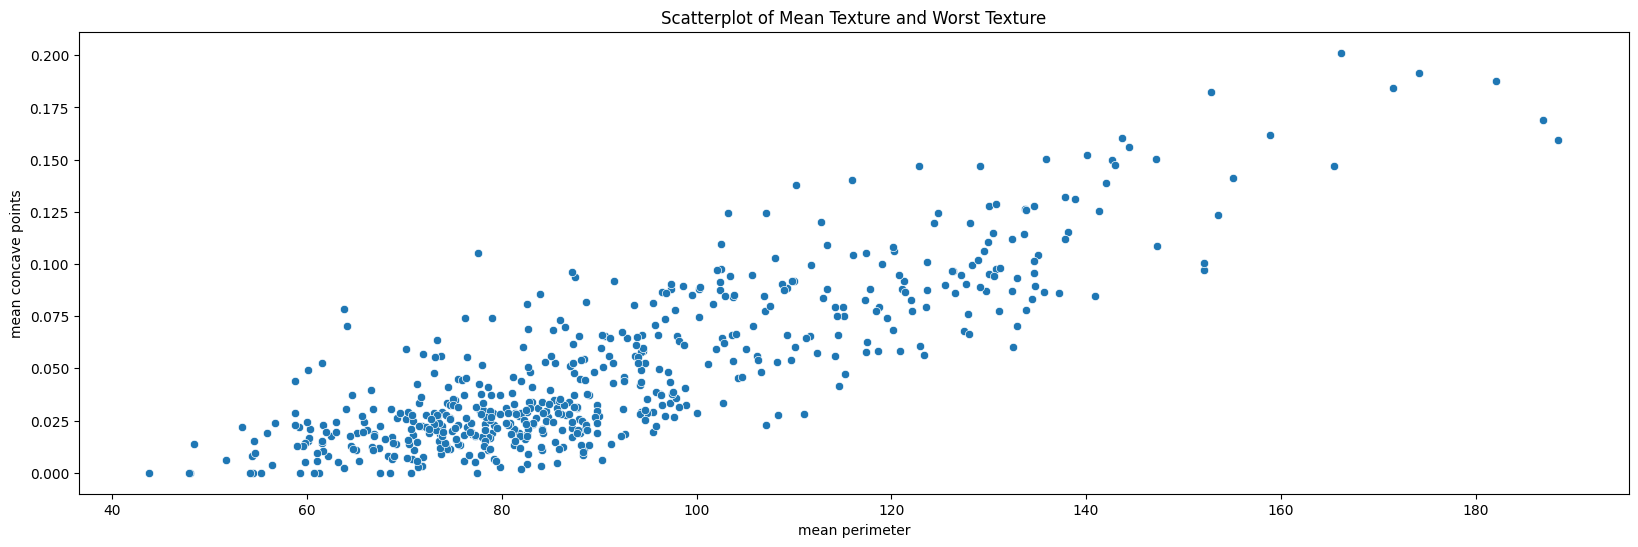

In [7]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='mean perimeter', y= 'mean concave points', data=df) # it will produce error change the to column name
plt.title('Scatterplot of Mean Texture and Worst Texture')
plt.show()

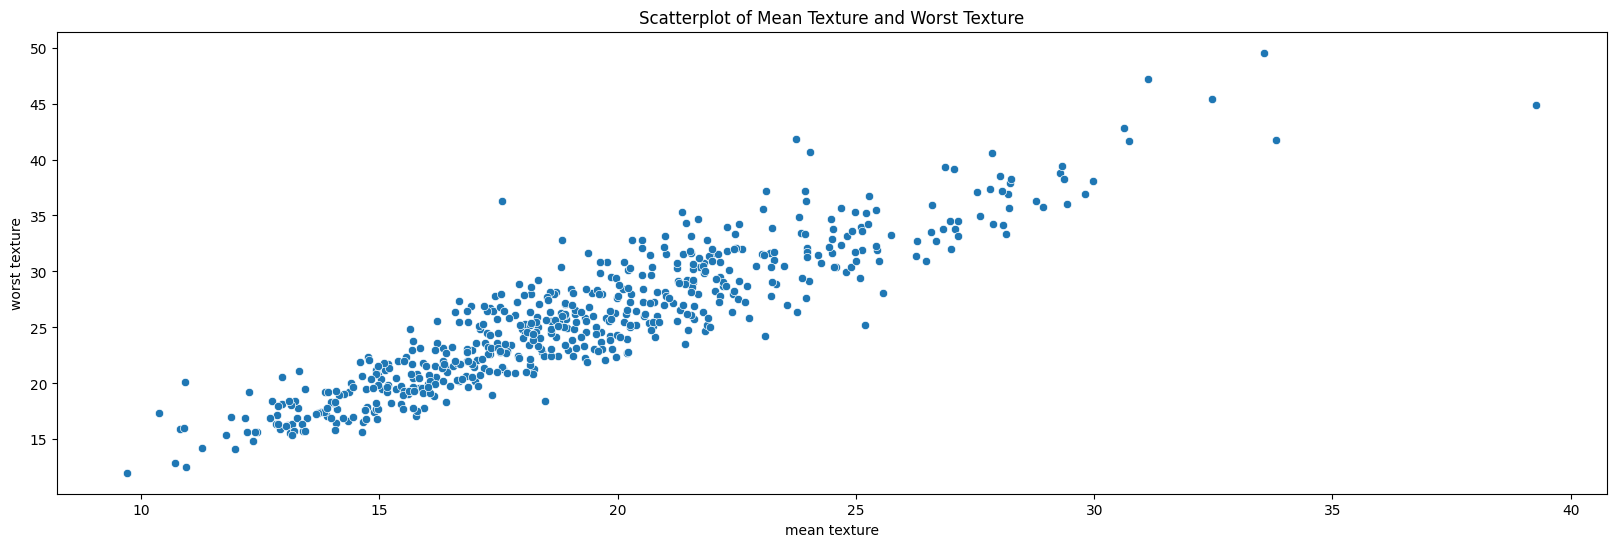

In [6]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='mean texture', y= 'worst texture', data=df) # it will produce error change the to column name
plt.title('Scatterplot of Mean Texture and Worst Texture')
plt.show()


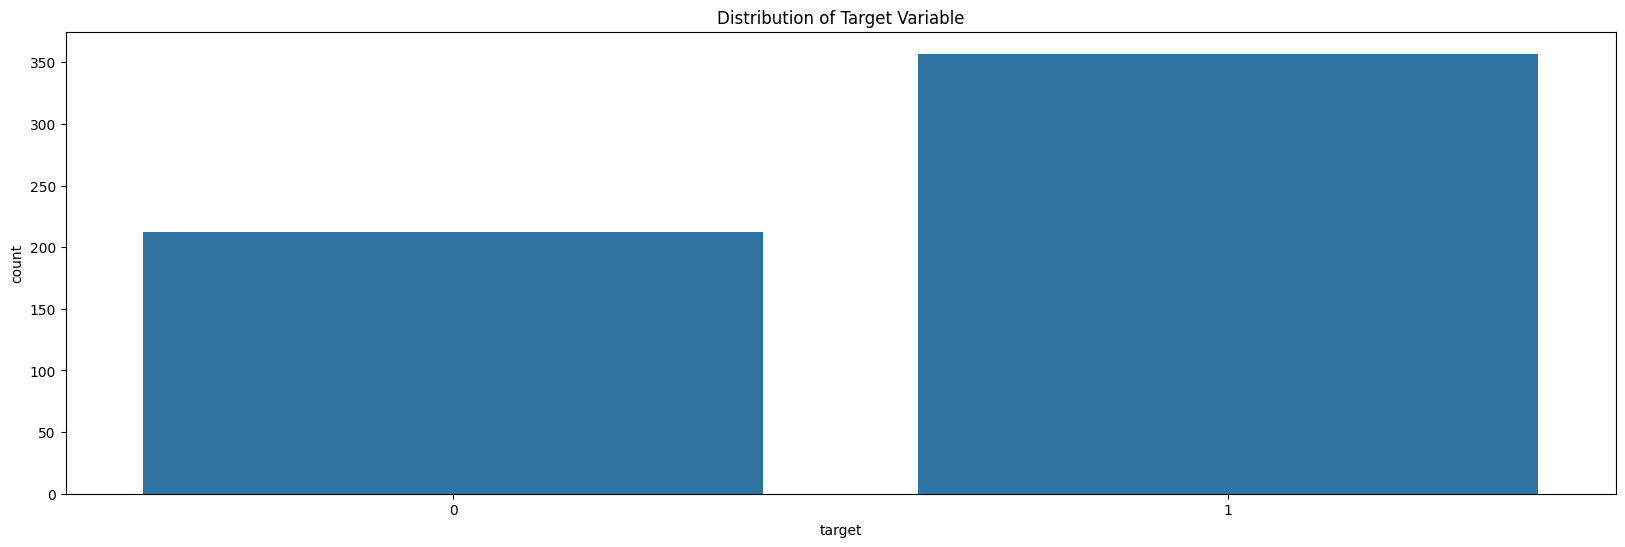

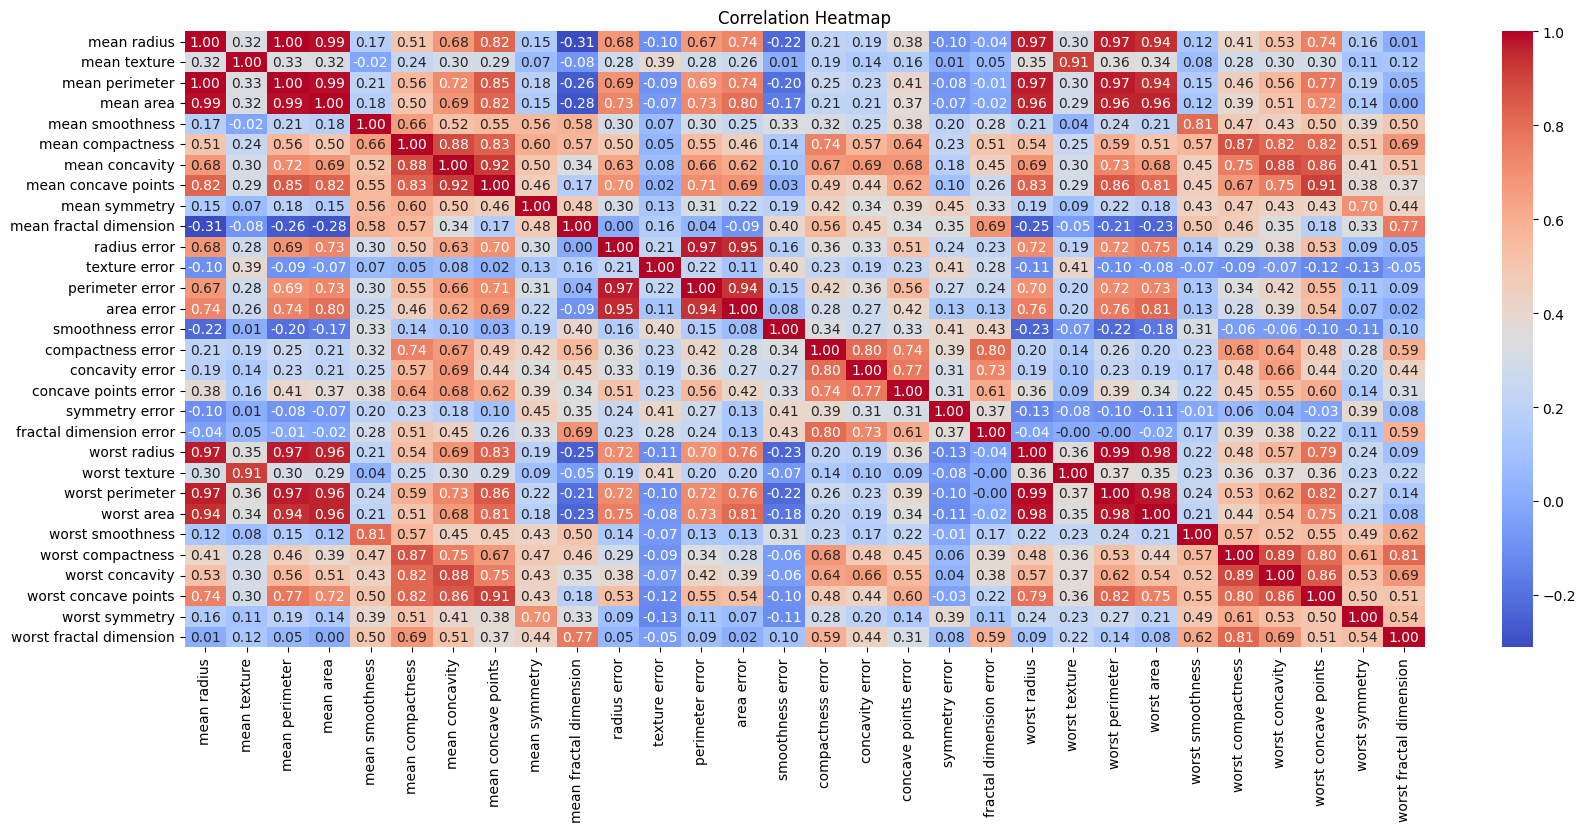

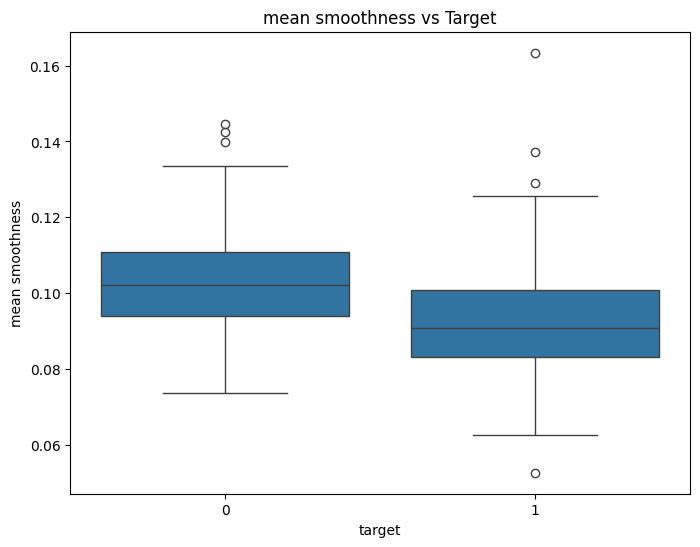

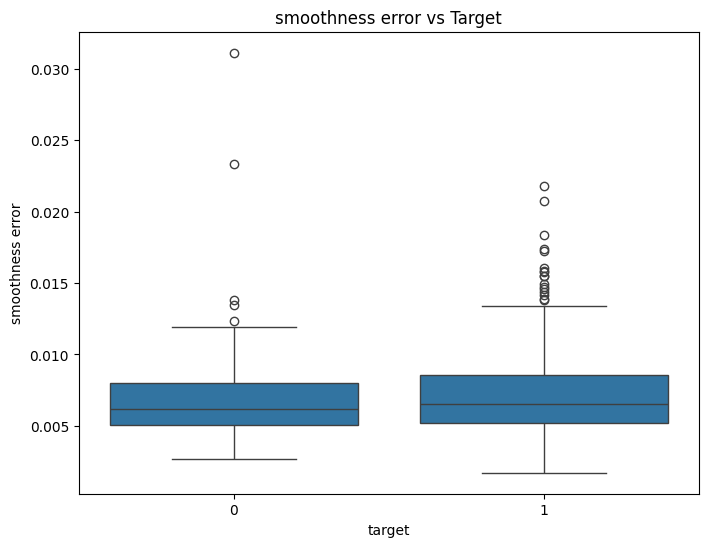

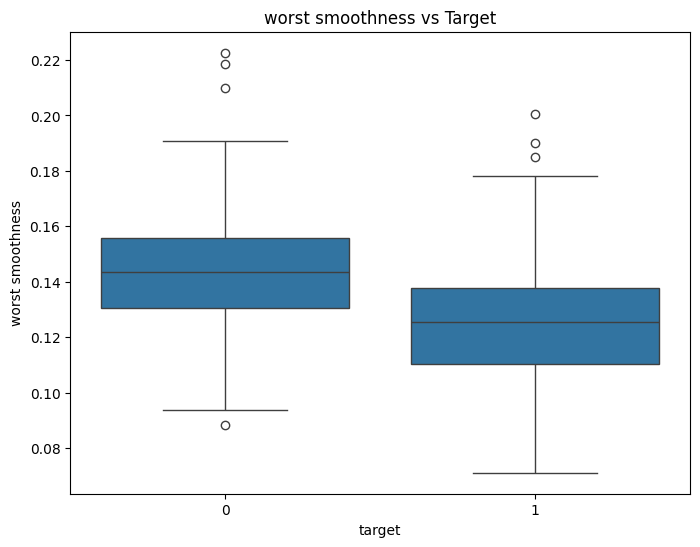

Initial f1 score: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Initial f1 score: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

F1 Score: 0.9647382344750765
Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97      

In [10]:
start = time.time()

a = 0
for i in range(1000):
  a += (i**100)

# Distribution of Target Variable
plt.figure(figsize=(20, 6))
# Check if 'target' is the correct column name, it might be 'Target', 'TARGET', or something else.
# If unsure, print data.columns to see all column names
sns.countplot(x='target', data=pd.concat([df, pd.DataFrame(data.target, columns=['target'])], axis=1))  # Replace 'target' with the actual column name if needed
plt.title('Distribution of Target Variable')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(20, 8))
# Convert the data to a Pandas DataFrame to use .corr()
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Key Features Against Target
key_features = ['mean smoothness', 'smoothness error', 'worst smoothness']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    # Use the current feature from the loop for the x-axis
    # and add the target column for the y-axis
    sns.boxplot(x='target', y=feature, data=pd.concat([df, pd.DataFrame(data.target, columns=['target'])], axis=1))
    plt.title(f'{feature} vs Target')
    plt.show()

## Data Preparation

# Splitting into Features and Target
# Replace 'target' with the actual column name if needed
X = df  # Use the DataFrame 'df' which contains the features
y = data.target  # Access the target variable from the original 'data' object

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Model

knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("Initial f1 score:", f1_score(y_test, y_pred_knn, average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

## Random Forest Model

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit the Model
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
print("Initial f1 score:", f1_score(y_test, y_pred, average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

## Hyperparameter Tuning with GridSearchCV

# Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1_micro', n_jobs=-1)
grid_search.fit(X_train, y_train)



# Evaluate the Best Model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
f1 = f1_score(y_test, y_pred_best, average='weighted')
print(f"F1 Score: {f1}")
print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))

end = time.time()

print("The time of exectution of above program is :",
      (end-start) * 10**3, "ms")